# Bank Credit Customer Analysis

## Aboud Dataset

### Context

The dataset contains 1000 registers about credits in a bank, each row represents a customer who takes a credit in the bank

### Content

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

### Goal

Finding patterns in the dataset for determinate what type of customer can take credits of highest amount

### Stakeholder Message

If exists missing data you can replace it by unknown word

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.templates.default = 'plotly_dark'

In [2]:
# Data
df = pd.read_csv('../german_credit_data.csv')

## Data Review

In [210]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [211]:
df.shape

(1000, 10)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Cleaning Data

In [213]:
# Verifying missing data
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [214]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [215]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [216]:
df['Saving accounts'] = df['Saving accounts'].fillna( 'unknown' )

In [217]:
df['Checking account'] = df['Checking account'].fillna( 'unknown' )

In [218]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [219]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,unknown,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,unknown,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [220]:
df = df.drop('Unnamed: 0', axis=1)

In [221]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [222]:
def age_cohorte(age):
  if age < 26:
    return '0-25'
  elif age < 51:
    return '26-50'
  else:
    return '51-75'  

In [223]:
df['Age Cohorte'] = df['Age'].apply( age_cohorte )

In [224]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Cohorte
0,67,male,2,own,unknown,little,1169,6,radio/TV,51-75
1,22,female,2,own,little,moderate,5951,48,radio/TV,0-25
2,49,male,1,own,little,unknown,2096,12,education,26-50
3,45,male,2,free,little,little,7882,42,furniture/equipment,26-50
4,53,male,2,free,little,little,4870,24,car,51-75


## EDA

In [225]:
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Cohorte
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,5,4,NaN,NaN,8,3
top,NaN,male,NaN,own,little,unknown,NaN,NaN,car,26-50
freq,NaN,690,NaN,713,603,394,NaN,NaN,337,697
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [226]:
sex_count = df['Sex'].value_counts().reset_index()
sex_count = sex_count.rename(columns={'index': 'Sex', 'Sex':'number_sex'})

px.bar(sex_count, x='Sex', y='number_sex', title='Number of people per sex')

In [227]:
purpose_table = df.groupby('Purpose').count().reset_index()
plt.figure(figsize = (8, 4), dpi=120)
px.bar(purpose_table, x='Purpose', 
       y= 'Credit amount', title='Number of credits per purpose',)

<Figure size 960x480 with 0 Axes>

In the plot above we can see the number of credits by purpose, and we have that mos people take a credit for car purpose and radio/tv purpose.  On the other hand we can see that credits for domestic appliances and vacations/others are less requested

In [228]:
plt.figure(figsize = (8, 4), dpi=120)
px.box(df, x='Purpose', y= 'Credit amount', color= 'Sex',
       title= 'Creadit Amount per Purporse')

<Figure size 960x480 with 0 Axes>

The pllot above shows that credits with the largest amounts is for vacations/others category and the smallest for domestic appliaces. Most of categories have outliers at top of the boxes (higher amounts), also we can see that in most of cases there are not differences between male and female customer, except in vacation/other, education categories, although in the case of vacation/other category we have to remember that there were few credits.

In [229]:
plt.figure(figsize = (8, 4), dpi=120)
px.scatter(df, x='Credit amount', y='Duration', color='Sex',
           title='Credit amount vs Duration')

<Figure size 960x480 with 0 Axes>

This plot shows first that if the credit amount and the duration increase, the number of credits decrease, second the highest concentration of credits are between 1k and 5k in credits amount and in terms of duration 1 and 22 months

In [230]:
plt.figure(figsize = (8, 4), dpi=120)
px.scatter(df, x='Credit amount', y='Age', color='Sex',
           title='Credit amount vs Age')

<Figure size 960x480 with 0 Axes>

The impression in the plot above is that women tend to be younger than men, besides women usually take lower credits

In [231]:
plt.figure(figsize = (8, 4), dpi=120)
px.histogram(df, x='Age Cohorte', y='Credit amount', color='Sex',
           title='Sum of Credit amount per age cohorte' )

<Figure size 960x480 with 0 Axes>

In [232]:
plt.figure(figsize = (8, 4), dpi=120)
px.scatter(df, x='Age', y='Duration', color='Sex',
           title='Duration vs Age')

<Figure size 960x480 with 0 Axes>

We continue seeing the trend that the women are younger than men and most of women have credits with a duration under 30 months

In [233]:
plt.figure(figsize = (8, 4), dpi=120)
px.box(df, x='Purpose', y='Duration', color='Sex',
           title='Duration vs Age')

<Figure size 960x480 with 0 Axes>

In this plot we can see that there is no many difference between men and women in duration with exception in education category  and vacation/other category, besides the shortest duration is for domestic applieces category and this have sense, since in the Credit amoung plot we saw that this category has the lowest amount of credits

## Modeling Clusters

In [234]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Cohorte
0,67,male,2,own,unknown,little,1169,6,radio/TV,51-75
1,22,female,2,own,little,moderate,5951,48,radio/TV,0-25
2,49,male,1,own,little,unknown,2096,12,education,26-50
3,45,male,2,free,little,little,7882,42,furniture/equipment,26-50
4,53,male,2,free,little,little,4870,24,car,51-75


In [235]:
df['Saving accounts'].unique()

array(['unknown', 'little', 'quite rich', 'rich', 'moderate'],
      dtype=object)

In [236]:
# first I am going to choose the columns to clusterization
clustering_data = df.drop(['Sex', 'Purpose', 
                           'Checking account', 'Job'], axis=1)

In [237]:
clustering_data.head()

,Age,Housing,Saving accounts,Credit amount,Duration,Age Cohorte
0,67,own,unknown,1169,6,51-75
1,22,own,little,5951,48,0-25
2,49,own,little,2096,12,26-50
3,45,free,little,7882,42,26-50
4,53,free,little,4870,24,51-75


In [238]:
def show_distributions(dataframe):
  fig = make_subplots(rows=3, cols=1,
                      subplot_titles=['Age Distribution', 'Duration Distribution',
                                      'Credit Amount Distribution'])
  graph1 = go.Histogram(x=dataframe['Age'].tolist())
  graph2 = go.Histogram(x=dataframe['Duration'].tolist())
  graph3 = go.Histogram(x=dataframe['Credit amount'].tolist())

  fig.append_trace(graph1, 1, 1)
  fig.append_trace(graph2, 2, 1)
  fig.append_trace(graph3, 3, 1)

  fig.show()

In [239]:
show_distributions(df)

In the 3 plot we can see that the data is skewed to the left, so I am going to use logarithmic transformation to fix it and get better results in clustering process

In [240]:
clustering_data['Age'] = np.log(clustering_data['Age'])
clustering_data['Duration'] = np.log(clustering_data['Duration'])
clustering_data['Credit amount'] = np.log(clustering_data['Credit amount'])

In [241]:
show_distributions(clustering_data)

### K-Means Clustering

In [242]:
# encoding data
kmeans_data = pd.get_dummies(clustering_data,
                             columns= ['Housing', 'Saving accounts'])

In [248]:
kmeans_data = kmeans_data.drop('Age Cohorte', axis=1)

In [244]:
from sklearn.preprocessing import StandardScaler

In [249]:
# Scaling data
scaler = StandardScaler()
kmeans_data[['Age', 'Duration','Credit amount']] = scaler.fit_transform(kmeans_data[['Age', 'Duration', 
                                                                      'Credit amount']])

In [250]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [251]:
# choosing number of clusters
inertias = []
for k in range(2, 11):
  model = KMeans( n_clusters= k )
  model.fit(kmeans_data)
  inertias.append( model.inertia_ )

Text(0, 0.5, 'Inertia')

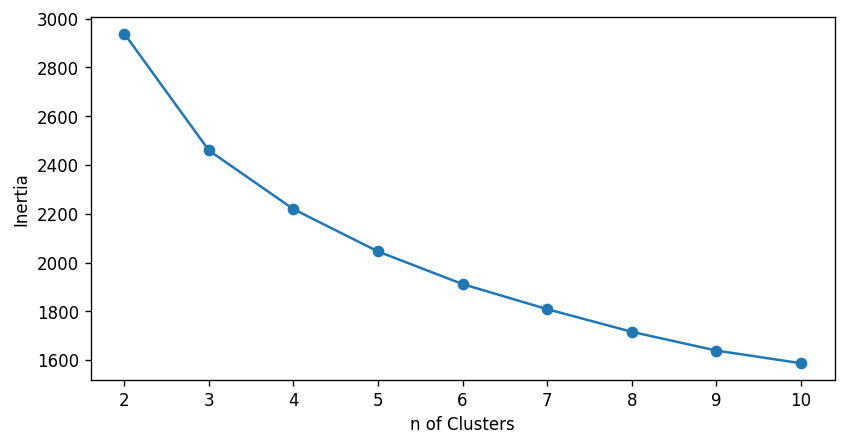

In [252]:
plt.figure(figsize = (8, 4), dpi=120)
plt.plot(range(2, 11), inertias, '-o')
plt.xlabel('n of Clusters')
plt.ylabel('Inertia')

In [345]:
silhoutte_score = []
for k in range(2, 11):
  model = KMeans( n_clusters= k, random_state= 1 )
  labels = model.fit_predict(kmeans_data)
  silhoutte_score.append(silhouette_score(kmeans_data, 
                                      labels, metric='euclidean'))
   

Text(0.5, 1.0, 'Silhoutte Score K-Means Clustering')

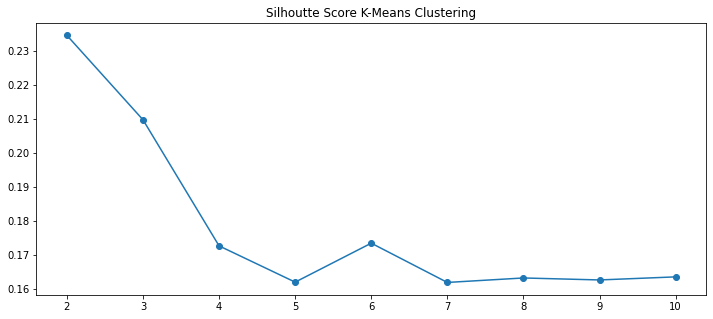

In [346]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 11), silhoutte_score , '-o')
plt.title('Silhoutte Score K-Means Clustering')

In the plot above we can see the number of clesters can be 4 or 6, I will choose 6

In [338]:
model = KMeans(n_clusters=6, random_state=1).fit(kmeans_data)

In [339]:
labels = pd.DataFrame(model.labels_)

In [340]:
clustered_data = df.assign(Cluster=labels)

In [341]:
clustered_data 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Cohorte,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,51-75,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0-25,4
2,49,male,1,own,little,unknown,2096,12,education,26-50,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,26-50,1
4,53,male,2,free,little,little,4870,24,car,51-75,1
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,26-50,5
996,40,male,3,own,little,little,3857,30,car,26-50,1
997,38,male,2,own,little,unknown,804,12,radio/TV,26-50,2
998,23,male,2,free,little,little,1845,45,radio/TV,0-25,0


In [342]:
group_table = clustered_data.groupby('Cluster').mean().round(1)

In [343]:
group_table

,Age,Job,Credit amount,Duration
Cluster,,,,
0,31.2,1.9,2516.6,21.6
1,49.5,2.2,5244.5,28.1
2,49.5,1.6,1484.6,11.4
3,25.8,1.8,2420.4,16.3
4,29.8,2.2,7174.0,38.0
5,28.7,1.8,1320.5,10.1


#### Insights

- Cluster 0 - Fourth lowest average age, fourth average credit amount and fourth average duration
- Cluste 1 - high average age, high credit amount and fith average duration
- Cluster 2 - high average age, low credit amount and short duration
- Cluster 3 - lowest average age with a low credit amount and short duration
- Cluster 4 - low average age whit the highest credit amount in dataset and long duration
- Cluster 5 - second average age with low credit amont and shortest duration

### Visualizing Clusters with PCA

In [347]:
from sklearn.decomposition import PCA

In [348]:
pca = PCA(n_components=2)
pca_kmeans = pca.fit_transform(kmeans_data)

In [350]:
pca_kmeans_df = pd.DataFrame(data=pca_kmeans, columns=['Component1', 'Component2'])
pca_kmeans_df.head(2)

,Component1,Component2
0,1.987714,2.342082
1,-2.017741,-1.433298


In [353]:
pca_kmeans_df['Cluster'] = clustered_data['Cluster']
pca_kmeans_df.head(2)

,Component1,Component2,Cluster
0,1.987714,2.342082,2
1,-2.017741,-1.433298,4


In [374]:
px.scatter(pca_kmeans_df, x='Component1', y='Component2', color='Cluster', title='Clusters K-Means')

## Clustering with KModes

In [270]:
from kmodes.kprototypes import KPrototypes

In [271]:
data = df.copy()

In [272]:
data.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Cohorte
0,67,male,2,own,unknown,little,1169,6,radio/TV,51-75
1,22,female,2,own,little,moderate,5951,48,radio/TV,0-25


In [273]:
data[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(
    data[['Age', 'Credit amount', 'Duration']]
)

In [278]:
data.head()

,Age,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,own,unknown,little,-0.745131,-1.236478,radio/TV
1,-1.191404,own,little,moderate,0.949817,2.248194,radio/TV
2,1.183312,own,little,unknown,-0.416562,-0.738668,education
3,0.831502,free,little,little,1.634247,1.750384,furniture/equipment
4,1.535122,free,little,little,0.566664,0.256953,car


In [281]:
# Get the position of categorical columns
cat_columns = [data.columns.get_loc(col) for col in list (data.select_dtypes('object').columns)]

In [282]:
cat_columns

[1, 2, 3, 6]

In [284]:
data_matrix = data.to_numpy()
data_matrix

array([[2.7664564848025224, 'own', 'unknown', ..., -0.7451314133870967,
        -1.2364778603818776, 'radio/TV'],
       [-1.1914039404570154, 'own', 'little', ..., 0.9498167893630399,
        2.2481943623946683, 'radio/TV'],
       [1.1833123146987072, 'own', 'little', ..., -0.4165624079606273,
        -0.738667542842371, 'education'],
       ...,
       [0.21583532185748686, 'own', 'little', ..., -0.8745032440026969,
        -0.738667542842371, 'radio/TV'],
       [-1.103451486562359, 'free', 'little', ..., -0.5055276942195742,
        1.999289203624915, 'radio/TV'],
       [-0.7516416709837335, 'own', 'moderate', ..., 0.4624571534823545,
        1.999289203624915, 'car']], dtype=object)

In [286]:
cost = []
for k in range(2, 11):
  model = KPrototypes(n_clusters=k, random_state=1, n_jobs=-1)
  model.fit_predict(data_matrix, categorical=cat_columns)
  cost.append(model.cost_)
    

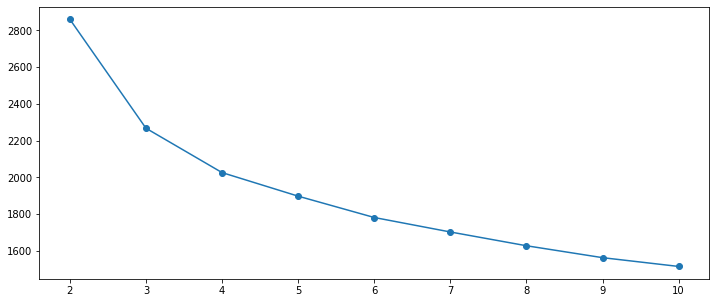

In [287]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 11), cost, '-o')

### Number of Clusters using Silhoutte score

If we want to use silhoutte score to see the number of clusters with mixed data (numerical and categorical, we have to create a matrix of distances, for this we can use Gower Method

In [289]:
import gower

In [290]:
#Creating distance matrix
dist_matrix = gower.gower_matrix(data)
dist_matrix

array([[0.        , 0.5263345 , 0.49438155, ..., 0.37516803, 0.48520568,
        0.6393258 ],
       [0.5263345 , 0.        , 0.4605244 , ..., 0.29976183, 0.32684314,
        0.31558013],
       [0.49438155, 0.4605244 , 0.        , ..., 0.18107416, 0.5661987 ,
        0.5735157 ],
       ...,
       [0.37516803, 0.29976183, 0.18107416, ..., 0.        , 0.40149012,
        0.5556103 ],
       [0.48520568, 0.32684314, 0.5661987 , ..., 0.40149012, 0.        ,
        0.60309976],
       [0.6393258 , 0.31558013, 0.5735157 , ..., 0.5556103 , 0.60309976,
        0.        ]], dtype=float32)

In [292]:
silhoutte = []
for k in range(2, 11):
  model = KPrototypes(n_clusters=k, random_state=1, n_jobs=-1)
  labels = model.fit_predict(dist_matrix, categorical=cat_columns)
  silhoutte.append( silhouette_score(dist_matrix, labels, metric='precomputed') )

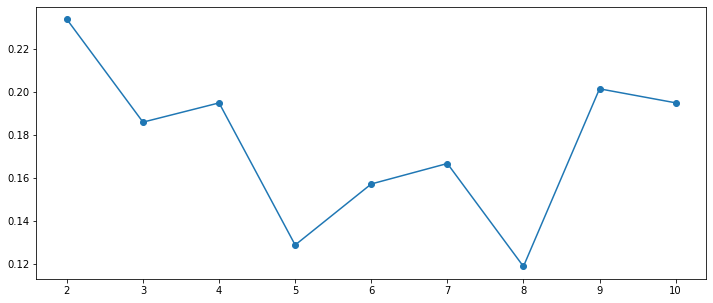

In [293]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, 11), silhoutte , '-o')

In [316]:
model = KPrototypes(n_clusters=4, n_jobs=-1 )
labels = model.fit_predict(data, categorical=cat_columns)

In [317]:
kprop_data = df.assign(Cluster=labels)

In [324]:
group_table = kprop_data.groupby('Cluster').mean().round(2)

In [325]:
group_table

,Age,Job,Credit amount,Duration
Cluster,,,,
0,36.53,2.25,9511.96,41.57
1,29.58,1.80,1711.86,13.06
2,52.44,1.78,2320.05,15.94
3,31.45,2.02,3801.38,27.97


In [377]:
group_table = kprop_data.groupby('Cluster').min().round(2)[['Age', 'Credit amount', 'Duration']]
group_table

,Age,Credit amount,Duration
Cluster,,,
0,21,5096,6
1,19,250,4
2,40,338,4
3,20,909,11


In [378]:
group_table = kprop_data.groupby('Cluster').max().round(2)[['Age', 'Credit amount', 'Duration']]
group_table

,Age,Credit amount,Duration
Cluster,,,
0,68,18424,72
1,42,6199,24
2,75,7865,42
3,54,8648,48


In [386]:
group_table = kprop_data.groupby('Cluster').count()[['Age']]
group_table

,Age
Cluster,
0,110
1,409
2,205
3,276


### Visualize Clusters with FAMD

In [360]:
from prince import FAMD

In [357]:
data_famd = kprop_data.drop('Cluster', axis=1)

In [361]:
famd = FAMD(n_components=2, n_iter=3, random_state=101)

In [369]:
famd_df = famd.fit_transform(data_famd)

In [370]:
famd_df['Cluster'] = kprop_data['Cluster']

In [373]:
px.scatter(famd_df, x=0, y=1, color='Cluster')

#### Insights

- Cluster 0 - second highest average age, the higher credit amount in the dataset and a long duration, this group have ages between 20 and 68 years besides this group represents the minority in the dataset and it is the most dispersed
- Cluster 1 - lower mean in age, lower mean in credit amount and shor duration this group have ages between 19 and 42 years and represent sthe majority in the dataset and it is the younger group in dataset
- Cluster 2 - higher mean of age with low credit amount and short duration this group have ages between 40 and 75 years and it is the oldest group
- Cluster 3 - second lowest average age, third lowest average credit mount and the second highest duration this group have ages between 20 and 54 years

#### Conclusion
People who can take credits of big money amount is people between 20 and 68 years old, besides they have skills to get a good job with good salary.

Company can make some investigations about the salary of this group and also about the jobs

# Have A Good Day!!